<div align='center'>
    <a href="https://ibb.co/Rymws0F"><img src="https://i.ibb.co/FVMTywr/a.webp" alt="a" border="0"></a>
</div>

# Project Content
* 1. [Import Libraries](#1)
* 2. [Import Dataset](#2)
* 3. [Understanding Variables](#3)
* 4. [Exploring Dataset](#4)
        * 4.1 [Duplicate Records ](#4.1)
        * 4.2 [Unique Values](#4.2)
        * 4.3 [Analysis Output](#4.3)
* 5. [Data Cleaning](#5)
        * 5.1 [Drop County Name Variable](#5.1)
        * 5.2 [stop_date and stop_time Variable](#5.2)
        * 5.3 [driver_gender Variable](#5.3)
        * 5.4 [driver_age_raw and driver_age Variable](#5.4)
        * 5.5 [stop_duration Variable](#5.5)
* 6. [EDA](#6)
        * 6.1 [Violation Analysis Per Gender](#6.1)
            * 6.1.1 [Violation Analysis By Gender In Details](#6.1.1)
        * 6.2 [Search Conducted By Driver Gender](#6.2)
            * 6.1.2 [Search Conducted By Gender In Details](#6.1.2)
        * 6.3 [Driver Gender](#6.3)
        * 6.4 [Driver's Race](#6.4)
            * 6.4.1 [Driver' Race Using Pie Chart](#6.4.1)
        * 6.5 [Violation Type](#6.5)
        * 6.6 [Search Conducted](#6.6)
        * 6.7 [Stop Outcome](#6.7)
        * 6.8 [Arrested Status ](#6.8)
        * 6.9 [Count Of Stop Durations](#6.9)
        * 6.10 [Drugs Related Stops](#6.10)
        * 6.11 [Stop Outcome by Driver Gender](#6.11)
        * 6.12 [Arerested By Driver Gender](#6.12)
        * 6.13 [Search Conducted by Driver Race](#6.13)
        * 6.14 [Drugs Related Stop by Driver Race ](#6.14)
        * 6.15 [Driver's Age Distribution](#6.15)
        * 6.16 [Boxplot of Driver Ages by Driver Gender](#6.16)
        * 6.17 [Violin Plot of Driver Ages by Driver Race](#6.17)
        * 6.18 [Driver's Age Distribution](#6.18)
            * 6.18.1 [Violation Type Statistical Analysis By Driver's Age](#6.18.1)
* 7. [Inferential Analysis](#7)
        * 7.1 [Hypothesis Testing - Gender Bias in Searches](#7.1)
        * 7.2 [Comparing Proportions - Search Outcomes by Gender](#7.2)


# 1. Import Libraries <a id=1></a>

In [602]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [603]:
# import dataset
df = pd.read_csv("police.csv")

## 3. Understanding Variables <a id=3></a>

In [604]:
df.info()
# there is a column which is all nan, and some columns has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

| Variable            | Description                                                                                            |
|---------------------|--------------------------------------------------------------------------------------------------------|
| stop_date           | Date of the traffic stop.                                                                              |
| stop_time           | Time of the traffic stop.                                                                              |
| county_name         | Name of the county (missing values for all entries).                                                   |
| driver_gender       | Gender of the driver.                                                                                  |
| driver_age_raw      | Raw age of the driver (numeric).                                                                       |
| driver_age          | Age of the driver (numeric).                                                                            |
| driver_race         | Race of the driver.                                                                                    |
| violation_raw       | Description of the violation (raw format).                                                              |
| violation           | Type of violation.                                                                                     |
| search_conducted    | Whether a search was conducted during the stop (boolean).                                               |
| search_type         | Type of search conducted during the stop (missing values for most entries).                             |
| stop_outcome        | Outcome of the traffic stop.                                                                           |
| is_arrested         | Whether an arrest was made during the stop (boolean).                                                   |
| stop_duration       | Duration of the traffic stop.                                                                          |
| drugs_related_stop  | Whether the stop was related to drugs (boolean).                                                       |


## 4. Exploring Dataset <a id=4></a>

In [605]:
# check df
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [606]:
# check df dim
df.shape

(91741, 15)

In [607]:
# check columns
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [608]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [609]:
df.duplicated().sum()

479

## 4.1 Duplicate Records <a id=4.1>

In [610]:
df[df.duplicated()]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,2005-07-19,00:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,2005-10-03,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,2005-10-04,00:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,2005-10-05,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,2005-10-08,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89720,2015-10-03,22:59,NaN,F,1968.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
89873,2015-10-10,08:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
90047,2015-10-16,20:37,NaN,F,1986.0,29.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
90136,2015-10-20,11:47,NaN,M,1971.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,16-30 Min,False


*As per above table , we can understand that those records are not duplicated*

## 4.2 Unique Values <a id=4.2></a>

In [611]:
pd.DataFrame(df.nunique(), columns=['Number of Unique Values'])

,Number of Unique Values
stop_date,3768
stop_time,1436
county_name,0
driver_gender,2
driver_age_raw,97
driver_age,78
driver_race,5
violation_raw,12
violation,6
search_conducted,2


In [612]:
def get_unique(col):
    unique_df = pd.DataFrame(df[col].unique(), columns=['Unique Values'])
    return unique_df

In [613]:
get_unique('driver_gender')

,Unique Values
0,M
1,F
2,NaN


In [614]:
get_unique('driver_race')

,Unique Values
0,White
1,Black
2,Asian
3,NaN
4,Hispanic
5,Other


In [615]:
get_unique('violation_raw')

,Unique Values
0,Speeding
1,Call for Service
2,Equipment/Inspection Violation
3,Other Traffic Violation
4,NaN
5,Registration Violation
6,Special Detail/Directed Patrol
7,APB
8,Violation of City/Town Ordinance
9,Suspicious Person


In [616]:
get_unique('violation')

,Unique Values
0,Speeding
1,Other
2,Equipment
3,Moving violation
4,NaN
5,Registration/plates
6,Seat belt


In [617]:
get_unique('search_conducted')

,Unique Values
0,False
1,True


In [618]:
get_unique('search_type')

,Unique Values
0,NaN
1,"Incident to Arrest,Protective Frisk"
2,Probable Cause
3,Incident to Arrest
4,"Probable Cause,Reasonable Suspicion"
5,"Incident to Arrest,Inventory,Probable Cause"
6,"Incident to Arrest,Inventory"
7,"Incident to Arrest,Probable Cause"
8,Protective Frisk
9,Reasonable Suspicion


In [619]:
get_unique('stop_outcome')

,Unique Values
0,Citation
1,Arrest Driver
2,NaN
3,N/D
4,Warning
5,Arrest Passenger
6,No Action


In [620]:
get_unique('is_arrested')

,Unique Values
0,False
1,True
2,NaN


In [621]:
get_unique('stop_duration')

,Unique Values
0,0-15 Min
1,16-30 Min
2,30+ Min
3,NaN
4,2
5,1


In [622]:
get_unique('drugs_related_stop')

,Unique Values
0,False
1,True


## 4.3 Analysis Output <a id=4.3></a>


1. **stop_date and stop_time**:
   - These columns represent the date and time of each traffic stop.
   - They are both non-null and have complete data, meaning there are no missing values.
   - These columns can be used to analyze patterns of traffic stops over time, such as daily, weekly, or monthly trends.

2. **county_name**:
   - This column has no non-null values, indicating that the county name information is missing for all entries.
   - Without county information, it may be challenging to perform county-specific analyses or comparisons.

3. **driver_gender**:
   - This column represents the gender of the driver.
   - It has some missing values (approximately 5,335 missing entries).
   - Gender distribution can be analyzed to understand if there are any disparities in traffic stops based on gender.

4. **driver_age_raw and driver_age**:
   - These columns represent the raw and processed age of the driver, respectively.
   - Both columns have some missing values.
   - Analyzing the age distribution of drivers involved in traffic stops can provide insights into the demographics of those stopped by law enforcement.

5. **driver_race**:
   - This column indicates the race of the driver.
   - Like gender, race distribution can be analyzed to identify any racial disparities in traffic stops.

6. **violation_raw and violation**:
   - These columns provide information about the violation committed by the driver, both in raw and processed formats.
   - There are some missing values in these columns.
   - Analyzing the types of violations can help identify the most common infractions and patterns in traffic stops.

7. **search_conducted and search_type**:
   - The search_conducted column is a boolean variable indicating whether a search was conducted during the stop.
   - The search_type column specifies the type of search conducted, with many missing values.
   - These columns can be analyzed to understand the frequency and circumstances under which searches are conducted during traffic stops.

8. **stop_outcome and is_arrested**:
   - The stop_outcome column provides information about the outcome of the traffic stop, such as citation, warning, or arrest.
   - The is_arrested column indicates whether an arrest was made during the stop.
   - Analyzing these columns can provide insights into the effectiveness of law enforcement actions during traffic stops.

9. **stop_duration**:
   - This column represents the duration of the traffic stop.
   - It has some missing values.
   - Analyzing stop durations can help understand the efficiency of law enforcement procedures during stops.

10. **drugs_related_stop**:
    - This boolean column indicates whether the stop was related to drugs.
    - Analyzing this variable can provide insights into the prevalence mns may require careful handling during analysis.

# 5. Data Cleaning <a id=5></a>

## 5.1 Drop County Name <a id=5.1></a>

In [623]:
df['county_name'].isnull().sum()

91741

*There are lots of missing values in this column, filling them may be not good approach as we do not have enough information about county name, so we can drop this column and disregard it in our analysis.*

In [624]:
# drop country_name feature
df.drop(columns= ['county_name'], axis=1, inplace = True)

## 5.2 stop_date and stop_time Variable<a id=5.2></a>

In [625]:
df.stop_date = pd.to_datetime(df.stop_date)

In [626]:
# Convert "stop_time" column to datetime format
df['stop_time'] = pd.to_datetime(df['stop_time'])

# Extract only the time component
df['stop_time'] = df['stop_time'].dt.time

# Recheck Dataframe
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## 5.3 driver_gender Variable <a id=5.3></a>

*Data type of this variable is 'Object', and its values is "True" and "False", so we just need to change its data type to boolean*

In [627]:
# df.driver_gender = df.driver_gender.astype(bool)

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   driver_gender       86406 non-null  object        
 3   driver_age_raw      86414 non-null  float64       
 4   driver_age          86120 non-null  float64       
 5   driver_race         86408 non-null  object        
 6   violation_raw       86408 non-null  object        
 7   violation           86408 non-null  object        
 8   search_conducted    91741 non-null  bool          
 9   search_type         3196 non-null   object        
 10  stop_outcome        86408 non-null  object        
 11  is_arrested         86408 non-null  object        
 12  stop_duration       86408 non-null  object        
 13  drugs_related_stop  91741 non-null  bool      

## 5.4 driver_age_raw and driver_age Variable <a id=5.4></a>

*driver_age_raw variable shows the driver's year of birth, at first step , i will change its column name to to indicate a better meaning of this variable*

In [629]:
df.rename(columns={'driver_age_raw': 'driver_yof'}, inplace=True) # driver_yof = driver year of birth

*An now i wanna change both variable's data type to integer instead of float*

In [630]:
df['driver_yof'] = df['driver_yof'].astype('Int64')  # 'Int64' is used to handle NaN values properly
df['driver_age'] = df['driver_age'].astype('Int64')

## 5.5 violation_raw and violation Variables <a id=5.5></a>

*Both variables show information about conducted violation, but the difference is that violation is type of conducted violation and violation_raw is descrption about vaiolation.* 
*So lets change their columns name as well!*

In [631]:
df.rename(columns={'violation_raw': 'violation_description', 'violation': 'violation_type'}, inplace=True)

# Check dataframe
df.head(1)

,stop_date,stop_time,driver_gender,driver_yof,driver_age,driver_race,violation_description,violation_type,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,M,1985,20,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## 5.6 stop_duration Variable

In [632]:
df.stop_duration.value_counts().to_frame()

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
30+ Min,3228
2,1
1,1


*This Variables shows the duration that driver were stopped by police for violations. As per above table that shows value counts of each data, there two unknown values which are "2" and "1". The dataset does not provide information about these values whethere they are hours or minutes. For first step , i would like to drop these records from dataset*

In [633]:
df = df[~df['stop_duration'].isin(['1', '2'])]

*Now that we removed them , lets categorize values of this variable as below*

In [634]:
df['stop_duration'] = df['stop_duration'].map({'0-15 Min': 'Short', '16-30 Min': 'Medium', '30+ Min' : 'Long'})

In [635]:
# Check dataframe for results
df.head(2)

,stop_date,stop_time,driver_gender,driver_yof,driver_age,driver_race,violation_description,violation_type,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,M,1985,20,White,Speeding,Speeding,False,NaN,Citation,False,Short,False
1,2005-01-18,08:15:00,M,1965,40,White,Speeding,Speeding,False,NaN,Citation,False,Short,False


# 6. EDA <a id=6></a>

## 6.1 Violation Analysis Per Gender <a id=6.1></a>

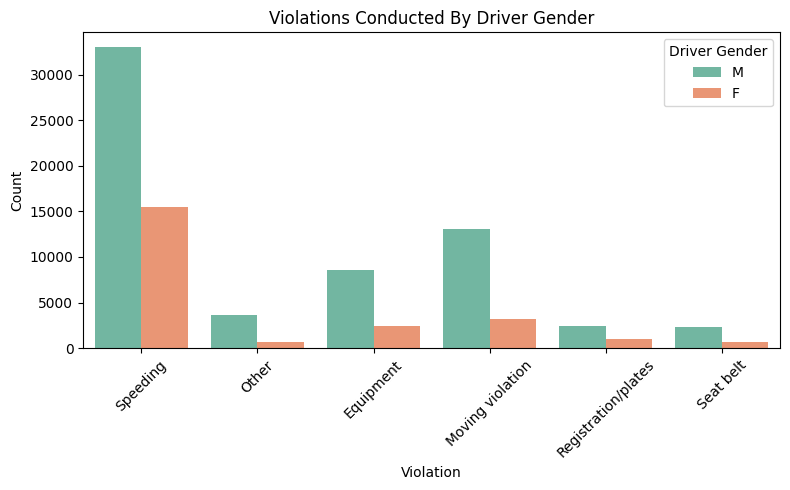

In [636]:
plt.figure(figsize=(8, 5))
sns.countplot(x='violation_type', hue='driver_gender', data=df, palette='Set2')
plt.title('Violations Conducted By Driver Gender')
plt.xlabel('Violation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Driver Gender')
plt.tight_layout()

# Show the plot
plt.show()

### 6.1.1 Violation Analysis By Gender In Details <a id=6.1.1></a>

In [637]:
violation_by_gender = pd.crosstab(df['driver_gender'], df['violation_type'])
violation_by_gender

violation_type,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15481
M,8533,13019,3627,2419,2317,32979


## 6.2 Search Conducted By Driver Gender <a id=6.2></a>

In [638]:
df.groupby('driver_gender')['search_conducted'].sum().to_frame()

,search_conducted
driver_gender,
F,471
M,2725


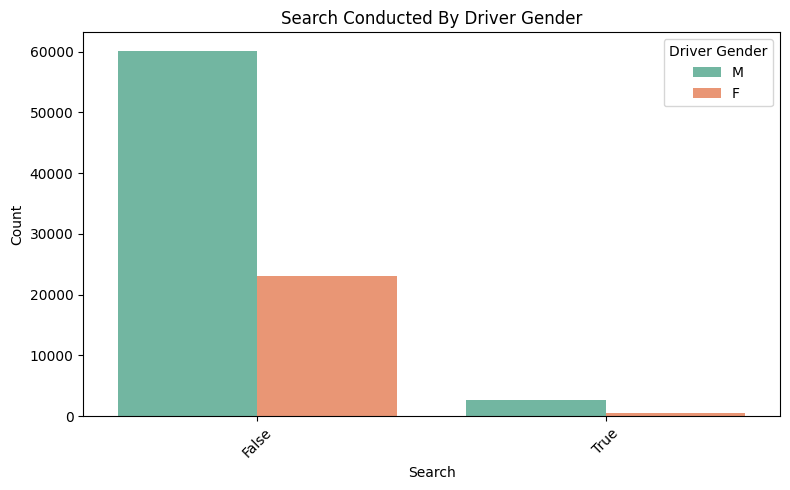

In [639]:
plt.figure(figsize=(8, 5))
sns.countplot(x='search_conducted', hue='driver_gender', data=df, palette='Set2')
plt.title('Search Conducted By Driver Gender')
plt.xlabel('Search')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Driver Gender')
plt.tight_layout()

# Show the plot
plt.show()

### 6.1.2 Search Conducted By Gender In Details <a id=6.1.2></a>

In [640]:
violation_by_gender = pd.crosstab(df['driver_gender'], df['search_conducted'])
violation_by_gender

search_conducted,False,True
driver_gender,,
F,23039,471
M,60169,2725


## 6.3 Driver Gender <a id=6.3></a>

Text(0, 0.5, 'Count')

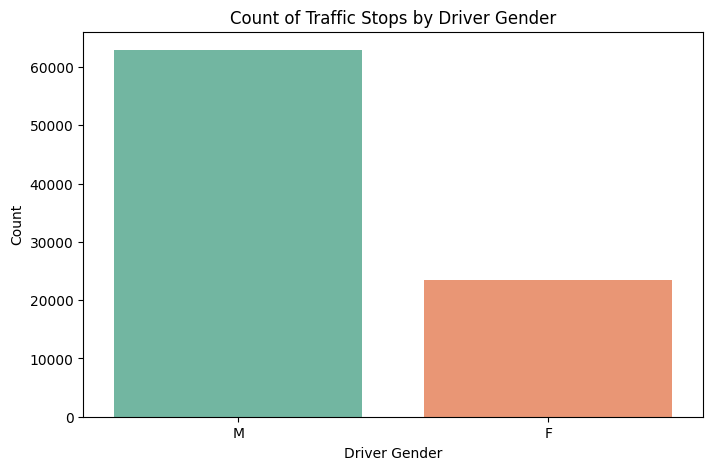

In [641]:
plt.figure(figsize=(8, 5))
sns.countplot(x='driver_gender', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Driver Gender')
plt.xlabel('Driver Gender')
plt.ylabel('Count')

## 6.4 Driver's Race <a id=6.4></a>

Text(0, 0.5, 'Count')

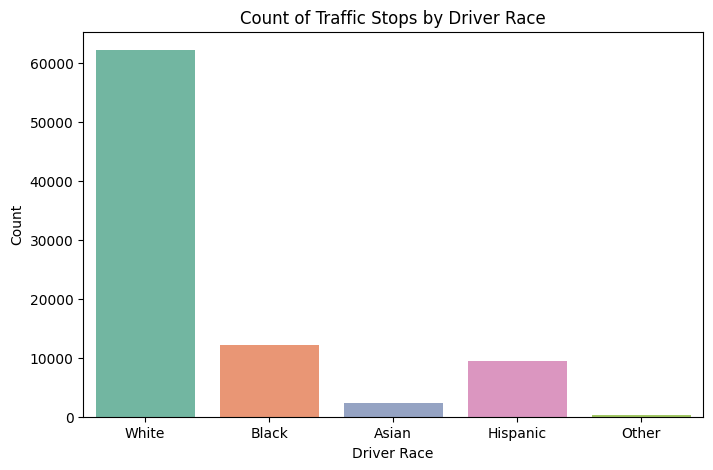

In [642]:
plt.figure(figsize=(8, 5))
sns.countplot(x='driver_race', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Count')

### 6.4.1 Driver' Race Using Pie Chart <a id=6.4.1></a>

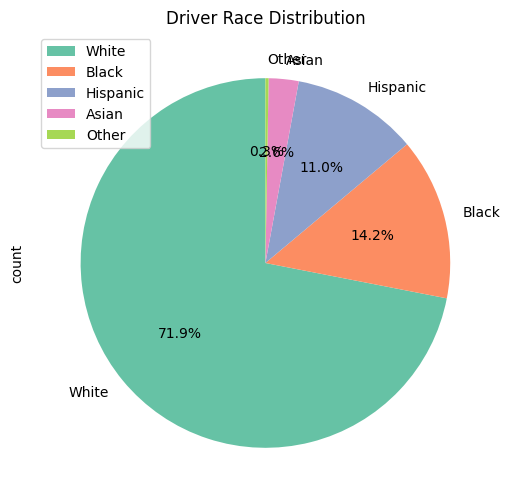

In [643]:
plt.figure(figsize=(6, 6))
df['driver_race'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('Set2'), startangle = 90)
plt.title('Driver Race Distribution')
plt.legend()
plt.show()

## 6.5 Violation Type <a id=6.5></a>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Speeding'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Equipment'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

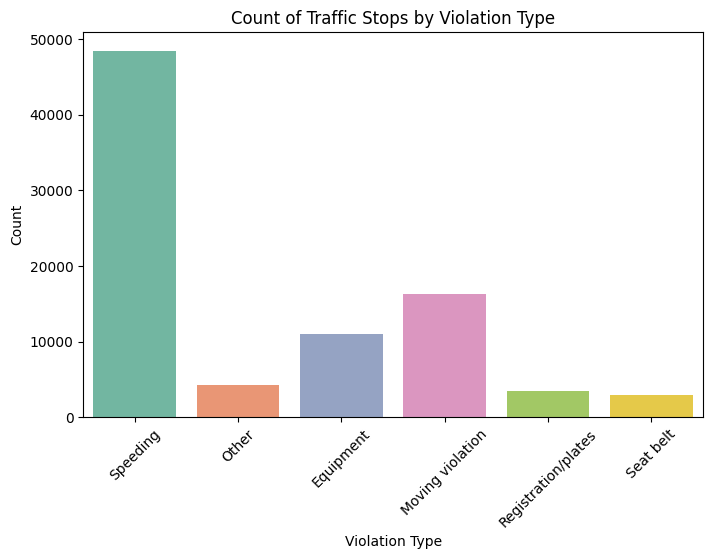

In [644]:
plt.figure(figsize=(8, 5))
sns.countplot(x='violation_type', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

## 6.6 Search Conducted <a id=6.6></a>

Text(0, 0.5, 'Count')

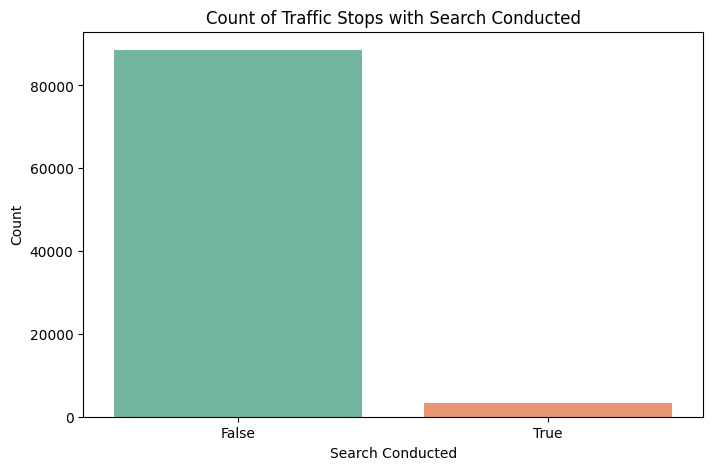

In [645]:
plt.figure(figsize=(8, 5))
sns.countplot(x='search_conducted', data=df, palette='Set2')
plt.title('Count of Traffic Stops with Search Conducted')
plt.xlabel('Search Conducted')
plt.ylabel('Count')

## 6.7 Stop Outcome <a id=6.7></a>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Citation'),
  Text(1, 0, 'Arrest Driver'),
  Text(2, 0, 'N/D'),
  Text(3, 0, 'Warning'),
  Text(4, 0, 'Arrest Passenger'),
  Text(5, 0, 'No Action')])

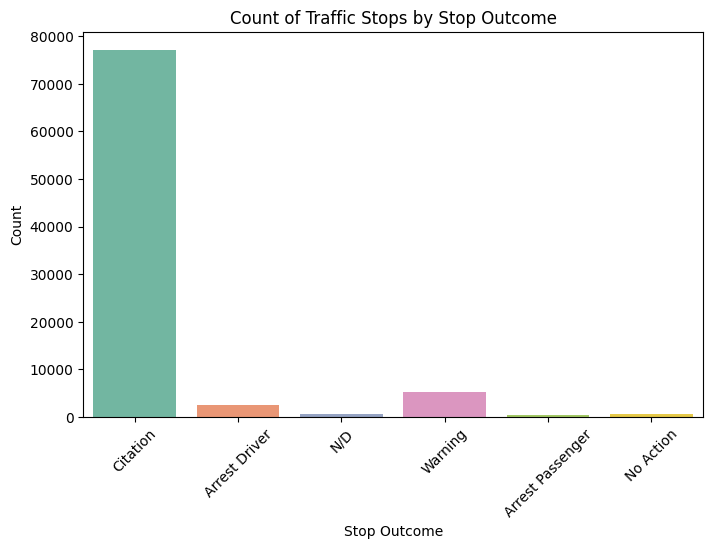

In [646]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stop_outcome', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Stop Outcome')
plt.xlabel('Stop Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

## 6.8 Arrested Status <a id=6.8></a>

Text(0, 0.5, 'Count')

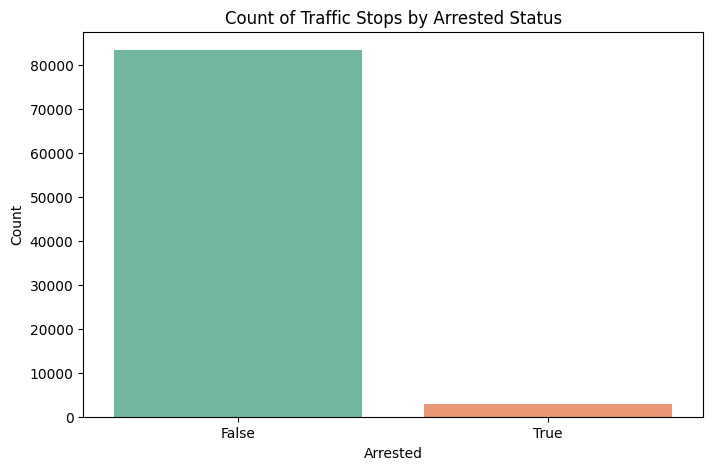

In [647]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_arrested', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Arrested Status')
plt.xlabel('Arrested')
plt.ylabel('Count')

## 6.9 Count Of Stop Durations <a id=6.9></a>

(array([0, 1, 2]),
 [Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')])

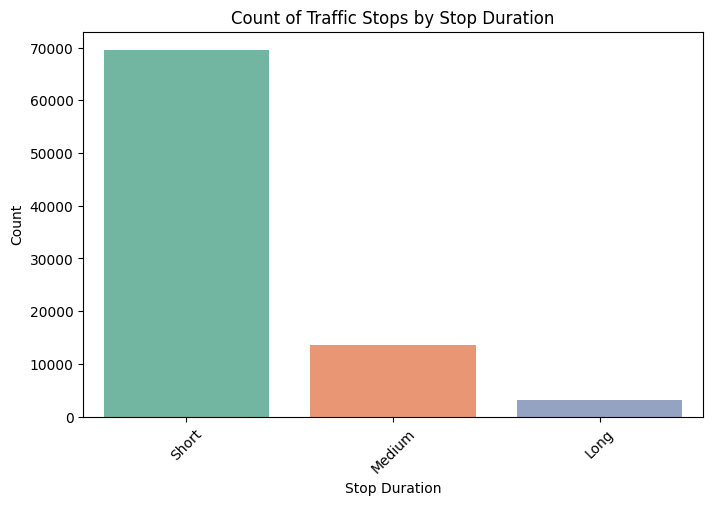

In [648]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stop_duration', data=df, palette='Set2')
plt.title('Count of Traffic Stops by Stop Duration')
plt.xlabel('Stop Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)

## 6.10 Drugs Related Stops <a id=6.10></a>

Text(0, 0.5, 'Count')

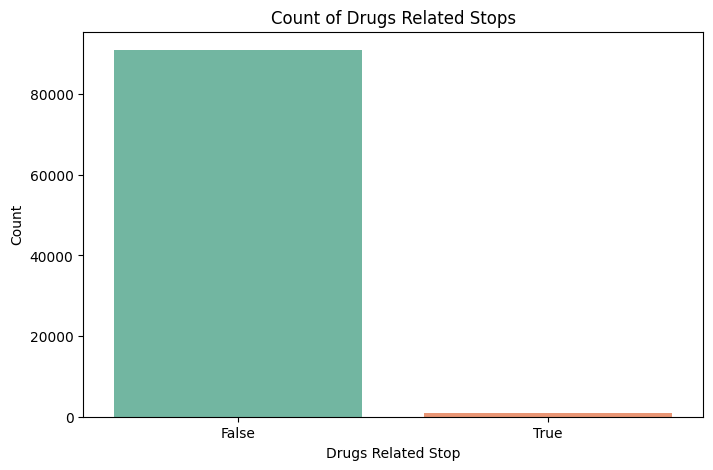

In [649]:
plt.figure(figsize=(8, 5))
sns.countplot(x='drugs_related_stop', data=df, palette='Set2')
plt.title('Count of Drugs Related Stops')
plt.xlabel('Drugs Related Stop')
plt.ylabel('Count')

## 6.11 Stop Outcome by Driver Gender <a id=6.11></a>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Citation'),
  Text(1, 0, 'Arrest Driver'),
  Text(2, 0, 'N/D'),
  Text(3, 0, 'Warning'),
  Text(4, 0, 'Arrest Passenger'),
  Text(5, 0, 'No Action')])

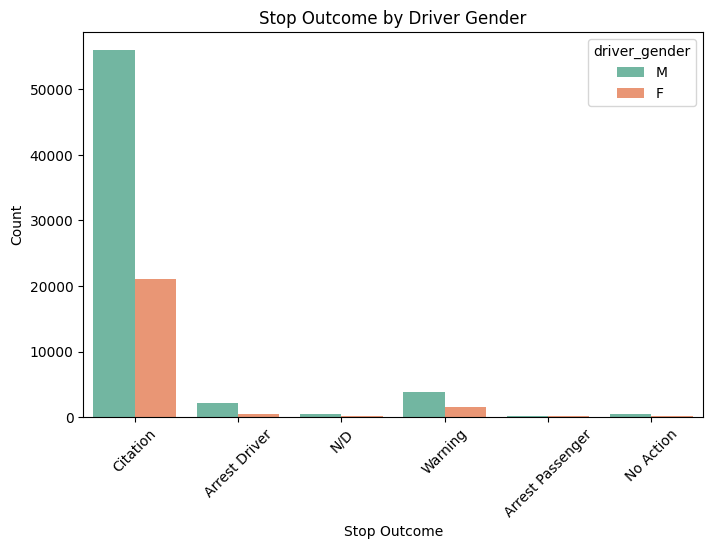

In [650]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stop_outcome', hue='driver_gender', data=df, palette='Set2')
plt.title('Stop Outcome by Driver Gender')
plt.xlabel('Stop Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

## 6.12 Arrested by Driver Gender <a id=6.12></a>

Text(0, 0.5, 'Count')

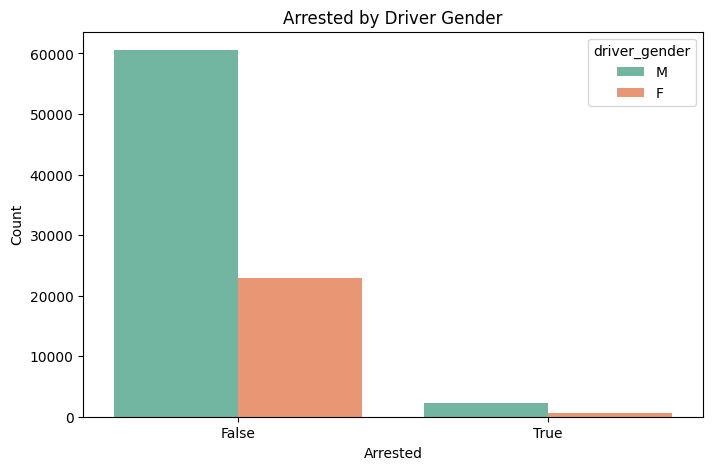

In [651]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_arrested', hue='driver_gender', data=df, palette='Set2')
plt.title('Arrested by Driver Gender')
plt.xlabel('Arrested')
plt.ylabel('Count')

## 6.12 Search Conducted by Driver Race <a id=6.12></a>

Text(0, 0.5, 'Count')

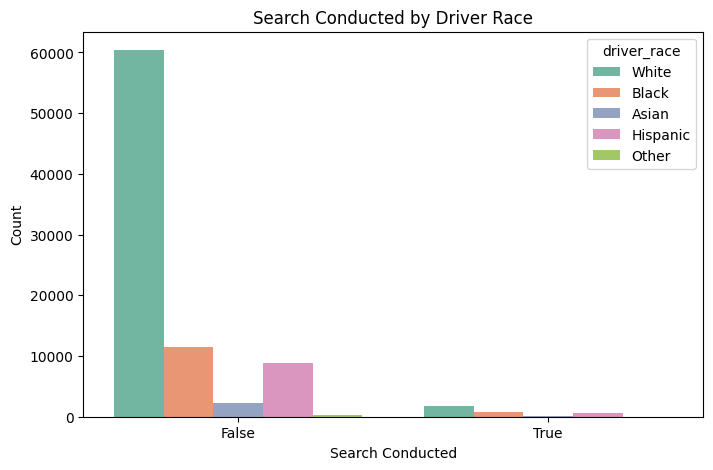

In [652]:
plt.figure(figsize=(8, 5))
sns.countplot(x='search_conducted', hue='driver_race', data=df, palette='Set2')
plt.title('Search Conducted by Driver Race')
plt.xlabel('Search Conducted')
plt.ylabel('Count')

## 6.14 Drugs Related Stop by Driver Race <a id=6.14></a>

Text(0, 0.5, 'Count')

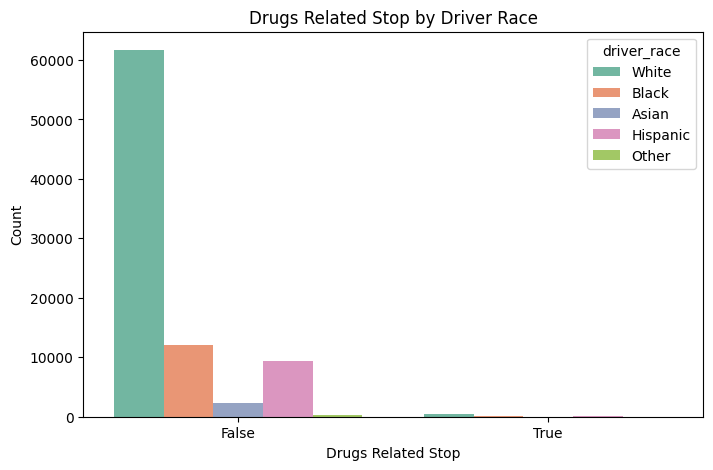

In [653]:
plt.figure(figsize=(8, 5))
sns.countplot(x='drugs_related_stop', hue='driver_race', data=df, palette='Set2')
plt.title('Drugs Related Stop by Driver Race')
plt.xlabel('Drugs Related Stop')
plt.ylabel('Count')

## 6.15 Driver's Age Distribution <a id=6.15></a>

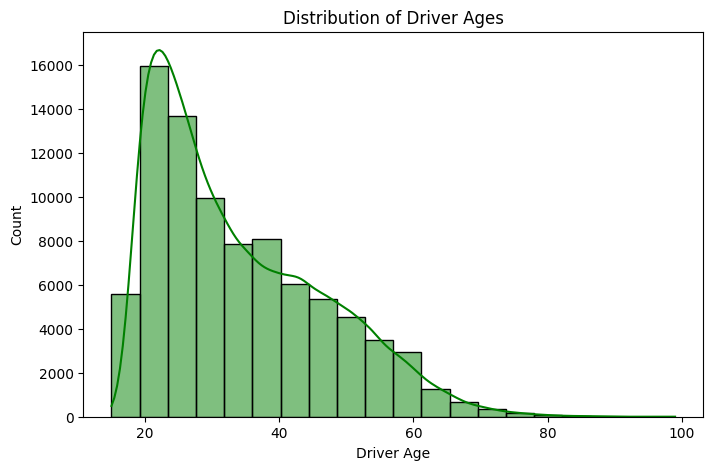

In [654]:
# Histogram of driver ages
plt.figure(figsize=(8, 5))
sns.histplot(df['driver_age'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Driver Ages')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.show()

## 6.16 Boxplot of Driver Ages by Driver Gender <a id=6.16></a>

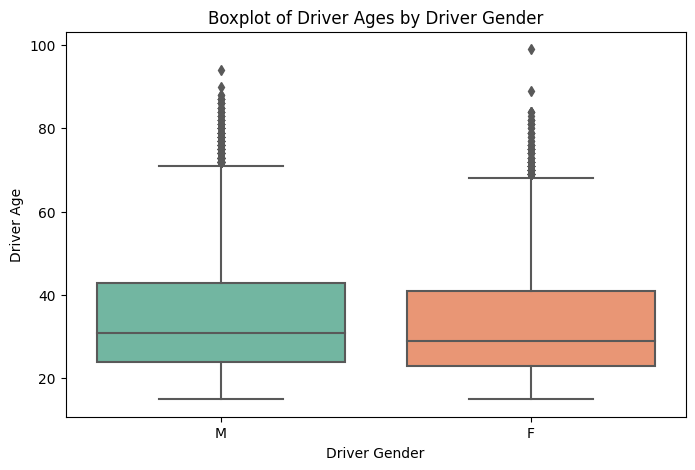

In [655]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='driver_gender', y='driver_age', data=df, palette='Set2')
plt.title('Boxplot of Driver Ages by Driver Gender')
plt.xlabel('Driver Gender')
plt.ylabel('Driver Age')
plt.show()

## 6.17 Violin Plot of Driver Ages by Driver Race <a id=6.17></a>

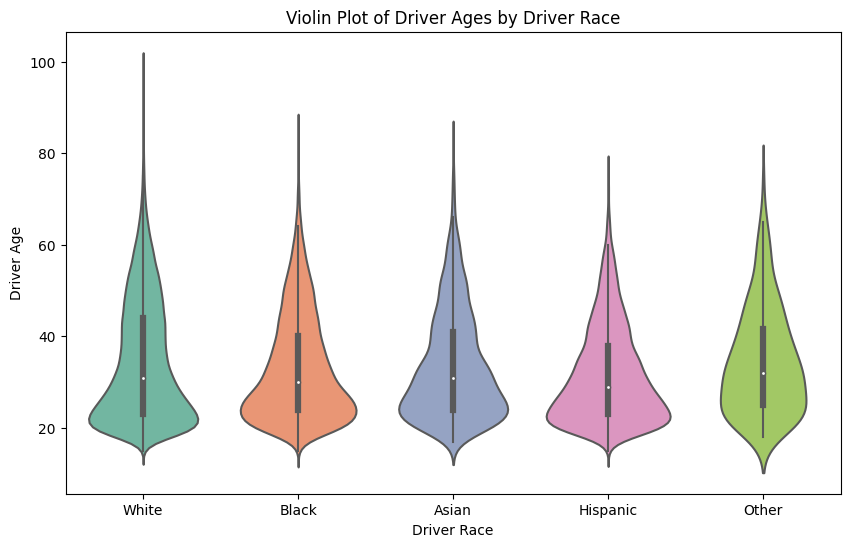

In [656]:
# Violin plot of driver ages by driver race
plt.figure(figsize=(10, 6))
sns.violinplot(x='driver_race', y='driver_age', data=df, palette='Set2')
plt.title('Violin Plot of Driver Ages by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Driver Age')
plt.show()

## 6.18 Driver's Age Distribution <a id=6.18></a>

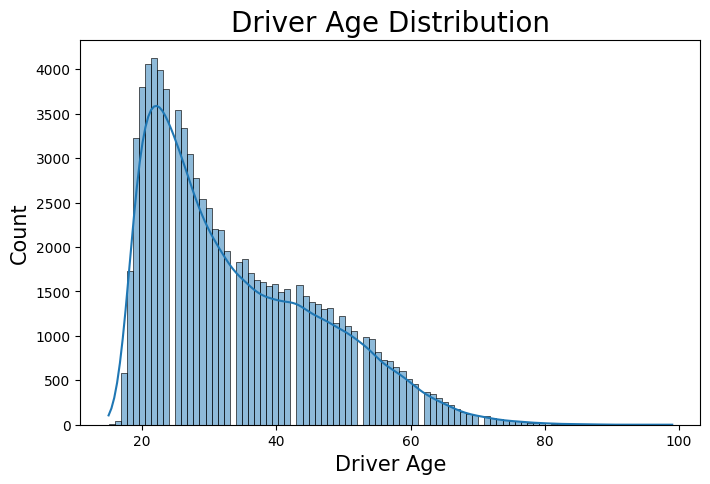

In [657]:
plt.figure(figsize=(8, 5))
sns.histplot(df['driver_age'], kde=True)
plt.title('Driver Age Distribution', fontsize = 20)
plt.xlabel("Driver Age", fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### 6.18.1 Violation Type Statistical Analysis By Driver's Age <a id=6.18.1></a>

In [658]:
df.groupby('violation_type')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation_type,,,,,,,,
Equipment,11007.0,31.781503,11.4009,16.0,23.0,28.0,38.0,89.0
Moving violation,16163.0,36.119037,13.185621,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.53687,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48360.0,33.529777,12.821787,15.0,23.0,30.0,42.0,90.0


# 7. Inferential Analysis <a id=7></a>

## 7.1  Hypothesis Testing - Gender Bias in Searches <a id=7.1></a>
* Hypothesis: There is no gender bias in searches during traffic stops.
* Test whether the proportion of searches conducted for males is significantly different from the proportion for females.

In [659]:
pd.crosstab(df['driver_gender'], df['search_conducted'])

search_conducted,False,True
driver_gender,,
F,23039,471
M,60169,2725


In [660]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['driver_gender'], df['search_conducted'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence of gender bias in searches.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of gender bias in searches.")

Reject the null hypothesis: There is evidence of gender bias in searches.


## 7.2 Comparing Proportions - Search Outcomes by Gender <a id=7.2></a>
* Null Hypothesis: The proportion of positive search outcomes is the same for both genders.
* Alternative Hypothesis: There is a significant difference in the proportion of positive search outcomes between genders.

In [661]:
# crosstab of driver_gender and search_coducted with mean of is_arrested
pd.crosstab(df['driver_gender'], df['search_conducted'], values=df['is_arrested'], aggfunc='mean')

search_conducted,False,True
driver_gender,,
F,0.018664,0.352442
M,0.023351,0.340183


In [662]:
from statsmodels.stats.proportion import proportions_ztest

# Create a contingency table for search outcomes by gender
contingency_table = pd.crosstab(df['driver_gender'], df['search_conducted'], values=df['is_arrested'], aggfunc='mean')

# Perform a two-proportion z-test
stat, p_value = proportions_ztest(contingency_table[True], contingency_table.sum(axis=1), alternative='two-sided')

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in search outcomes between genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference in search outcomes between genders.")

Fail to reject the null hypothesis: No significant difference in search outcomes between genders.
